In [1]:
import numpy as np             
import matplotlib.pyplot as plt
import pandas as pd             
import seaborn as sns
import sklearn                 
import nltk      
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, Normalizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
  

Задача представляет собой бинарную классификацию, оценивающую задержку вылета. Используется классификационный набор данных с подробной информацией об авиакомпаниях, погоде, аэропортах и занятости. Данные содержат дату и аэропорт вылета, информацию о самолете (кол-во мест, авиакомпанию, срок службы), об авиакомпании (среднее кол-во рейсов в месяц, среднее кол-во пассажиров за месяц, кол-во бортпроводников), о погоде (осадки за день, кол-во выпавшего снега, кол-во снега за день, макс. температуру за день, макс. скорость ветра за день), об аэропорте (название, широта, долгота, среднее кол-о вылетов в месяц, среднее кол-во пассажиров за месяц) 

In [2]:
data = pd.read_csv('data.csv')
data

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND,CARRIER_HISTORICAL,DEP_AIRPORT_HIST,DAY_HISTORICAL,DEP_BLOCK_HIST
0,4,6,0,1000-1059,3,3,5,110,Delta Air Lines Inc.,6837,...,Atlanta Municipal,0.00,0.0,0.0,64.0,13.87,0.139558,0.180307,0.177124,0.147773
1,3,2,0,1000-1059,2,2,31,50,Endeavor Air Inc.,14450,...,Bangor International,0.00,0.0,0.0,48.0,12.08,0.155571,0.187883,0.132868,0.156045
2,2,5,0,1000-1059,8,2,37,173,United Air Lines Inc.,16530,...,Los Angeles International,0.00,0.0,0.0,54.0,10.07,0.189496,0.240316,0.236965,0.187484
3,4,6,0,0900-0959,11,2,37,181,Alaska Airlines Inc.,17522,...,Portland International,0.00,0.0,0.0,64.0,7.38,0.132326,0.112840,0.177124,0.135374
4,8,7,0,0900-0959,1,2,27,143,Southwest Airlines Co.,14220,...,Spokane International,0.00,0.0,0.0,104.0,4.92,0.192550,0.123487,0.196519,0.138067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1946714,5,1,0,0800-0859,3,1,48,160,Delta Air Lines Inc.,20794,...,NONE,0.03,0.0,0.0,70.0,9.40,0.141341,0.187883,0.193668,0.111033
1946715,4,4,0,0800-0859,3,2,28,76,Endeavor Air Inc.,12669,...,Pittsburgh International,0.00,0.0,0.0,63.0,10.96,0.188378,0.149965,0.171317,0.106597
1946716,12,2,0,1200-1259,3,1,54,129,Atlantic Southeast Airlines,15165,...,NONE,0.20,0.0,0.0,84.0,8.50,0.243554,0.187883,0.199784,0.210959
1946717,4,6,0,0600-0659,10,1,19,159,JetBlue Airways,8560,...,NONE,0.00,0.0,0.0,85.0,14.09,0.267584,0.187883,0.177124,0.075131


In [3]:
data.dtypes

MONTH                              int64
DAY_OF_WEEK                        int64
DEP_DEL15                          int64
DEP_TIME_BLK                      object
DISTANCE_GROUP                     int64
SEGMENT_NUMBER                     int64
CONCURRENT_FLIGHTS                 int64
NUMBER_OF_SEATS                    int64
CARRIER_NAME                      object
AIRPORT_FLIGHTS_MONTH              int64
AIRLINE_FLIGHTS_MONTH              int64
AIRLINE_AIRPORT_FLIGHTS_MONTH      int64
AVG_MONTHLY_PASS_AIRPORT           int64
AVG_MONTHLY_PASS_AIRLINE           int64
FLT_ATTENDANTS_PER_PASS          float64
GROUND_SERV_PER_PASS             float64
PLANE_AGE                          int64
DEPARTING_AIRPORT                 object
LATITUDE                         float64
LONGITUDE                        float64
PREVIOUS_AIRPORT                  object
PRCP                             float64
SNOW                             float64
SNWD                             float64
TMAX            

In [4]:
dep_time_blk = data['DEP_TIME_BLK'].value_counts().index.values.tolist()
data['DEP_TIME_BLK'] = data['DEP_TIME_BLK'].replace(dep_time_blk, range(len(dep_time_blk)))

carrier_names = data['CARRIER_NAME'].value_counts().index.values.tolist()
data['CARRIER_NAME'] = data['CARRIER_NAME'].replace(carrier_names, range(len(carrier_names)))

departing_airports = data['DEPARTING_AIRPORT'].value_counts().index.values.tolist()
data['DEPARTING_AIRPORT'] = data['DEPARTING_AIRPORT'].replace(departing_airports, range(len(departing_airports)))

previous_airports = data['PREVIOUS_AIRPORT'].value_counts().index.values.tolist()
data['PREVIOUS_AIRPORT'] = data['PREVIOUS_AIRPORT'].replace(previous_airports, range(len(previous_airports)))

Основные статистические характеристики:

mean - среднее значение, std - стандартное отклонение, min - минимум, 25% - нижнее значение первого квантиля, 50% - медиана, 75% - верхнее значение первого квантиля, max - максимум

In [5]:
data.describe()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND,CARRIER_HISTORICAL,DEP_AIRPORT_HIST,DAY_HISTORICAL,DEP_BLOCK_HIST
count,1.946719e+06,1.946719e+06,1.946719e+06,1.946719e+06,1.946719e+06,1.946719e+06,1.946719e+06,1.946719e+06,1.946719e+06,1.946719e+06,...,1.946719e+06,1.946719e+06,1.946719e+06,1.946719e+06,1.946719e+06,1.946719e+06,1.946719e+06,1.946719e+06,1.946719e+06,1.946719e+06
mean,6.605346e+00,3.933517e+00,1.891439e-01,7.558436e+00,3.823152e+00,3.046044e+00,2.781842e+01,1.336911e+02,4.084488e+00,1.267370e+04,...,3.271401e+01,1.037643e-01,3.144054e-02,9.145660e-02,7.145979e+01,8.342156e+00,1.891821e-01,1.878829e-01,1.891136e-01,1.891108e-01
std,3.397387e+00,1.995051e+00,3.916230e-01,4.951455e+00,2.383304e+00,1.757474e+00,2.150235e+01,4.639916e+01,4.098180e+00,8.835739e+03,...,4.834087e+01,3.408176e-01,3.174283e-01,7.266137e-01,1.835401e+01,3.608886e+00,4.748192e-02,4.160966e-02,3.825498e-02,7.769750e-02
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.400000e+01,0.000000e+00,1.100000e+03,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+01,0.000000e+00,6.440829e-02,4.342273e-02,1.044504e-01,5.556236e-02
25%,4.000000e+00,2.000000e+00,0.000000e+00,3.000000e+00,2.000000e+00,2.000000e+00,1.100000e+01,9.000000e+01,1.000000e+00,5.345000e+03,...,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.900000e+01,5.820000e+00,1.546513e-01,1.667402e-01,1.608679e-01,1.273809e-01
50%,7.000000e+00,4.000000e+00,0.000000e+00,7.000000e+00,3.000000e+00,3.000000e+00,2.300000e+01,1.430000e+02,3.000000e+00,1.156200e+04,...,1.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,7.400000e+01,7.830000e+00,1.865162e-01,1.878829e-01,1.914734e-01,1.874842e-01
75%,1.000000e+01,6.000000e+00,0.000000e+00,1.200000e+01,5.000000e+00,4.000000e+00,3.900000e+01,1.720000e+02,6.000000e+00,1.761500e+04,...,4.200000e+01,2.000000e-02,0.000000e+00,0.000000e+00,8.600000e+01,1.029000e+01,2.159451e-01,2.024857e-01,2.199390e-01,2.437018e-01
max,1.200000e+01,7.000000e+00,1.000000e+00,1.800000e+01,1.100000e+01,1.500000e+01,1.090000e+02,3.370000e+02,1.600000e+01,3.525600e+04,...,3.550000e+02,1.163000e+01,1.720000e+01,2.520000e+01,1.150000e+02,3.378000e+01,3.502349e-01,3.521604e-01,2.707092e-01,3.906001e-01


Как распределяется задержка вылета (0 - задержка не более 15 минут, 1 - задержка более 15 минут):

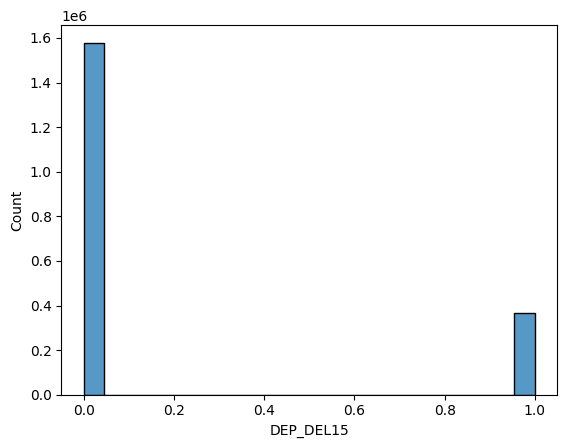

In [6]:
sns.histplot(data['DEP_DEL15'])
pass

Матрица корреляции

In [7]:
corr_matrix = data.corr()
corr_matrix

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND,CARRIER_HISTORICAL,DEP_AIRPORT_HIST,DAY_HISTORICAL,DEP_BLOCK_HIST
MONTH,1.000000,0.006345,-0.019902,0.001840,-0.003279,0.017196,0.023018,0.002945,0.004661,0.037189,...,0.008383,-0.005812,-0.053110,-0.088553,0.173082,-0.119405,-0.154422,-0.115901,-0.191439,-0.093428
DAY_OF_WEEK,0.006345,1.000000,-0.000595,-0.000357,0.013944,-0.030486,-0.027839,0.009912,0.010055,-0.002342,...,-0.000483,0.017612,-0.005878,-0.009687,0.007118,0.000778,0.006101,0.000752,0.000117,0.006494
DEP_DEL15,-0.019902,-0.000595,1.000000,0.110502,0.016969,0.117962,0.008204,0.012105,0.001833,0.026408,...,-0.000131,0.080682,0.049977,0.025786,-0.008322,0.051130,0.121834,0.099531,0.099648,0.198806
DEP_TIME_BLK,0.001840,-0.000357,0.110502,1.000000,-0.022820,0.513131,-0.030620,0.005990,0.005096,0.076158,...,0.100864,-0.006592,-0.005847,-0.003195,0.015667,0.002480,0.030529,0.003458,0.009229,0.551241
DISTANCE_GROUP,-0.003279,0.013944,0.016969,-0.022820,1.000000,-0.236922,-0.035258,0.447446,-0.081402,-0.013548,...,-0.215850,-0.012138,0.000075,-0.006847,0.003644,0.024929,0.033867,0.045092,0.005504,-0.037565
SEGMENT_NUMBER,0.017196,-0.030486,0.117962,0.513131,-0.236922,1.000000,0.014143,-0.202249,0.042785,0.042236,...,0.298362,-0.016431,-0.014555,-0.006950,0.029662,-0.024588,-0.010694,-0.040215,0.019079,0.649940
CONCURRENT_FLIGHTS,0.023018,-0.027839,0.008204,-0.030620,-0.035258,0.014143,1.000000,-0.053612,-0.001002,0.849087,...,0.294910,-0.016371,-0.016554,-0.027287,0.025999,0.058779,-0.077791,-0.042272,0.012688,0.055327
NUMBER_OF_SEATS,0.002945,0.009912,0.012105,0.005990,0.447446,-0.202249,-0.053612,1.000000,-0.315097,0.003759,...,-0.369482,-0.013105,-0.008939,-0.015781,0.060733,-0.017588,0.071428,0.049054,-0.002320,-0.035947
CARRIER_NAME,0.004661,0.010055,0.001833,0.005096,-0.081402,0.042785,-0.001002,-0.315097,1.000000,-0.025909,...,0.200052,0.000582,-0.001398,0.005267,-0.001554,0.017709,0.020164,-0.052942,0.000685,0.009502
AIRPORT_FLIGHTS_MONTH,0.037189,-0.002342,0.026408,0.076158,-0.013548,0.042236,0.849087,0.003759,-0.025909,1.000000,...,0.272443,-0.011483,-0.009314,-0.032987,0.038822,0.071411,-0.065284,-0.033124,0.005388,0.087095


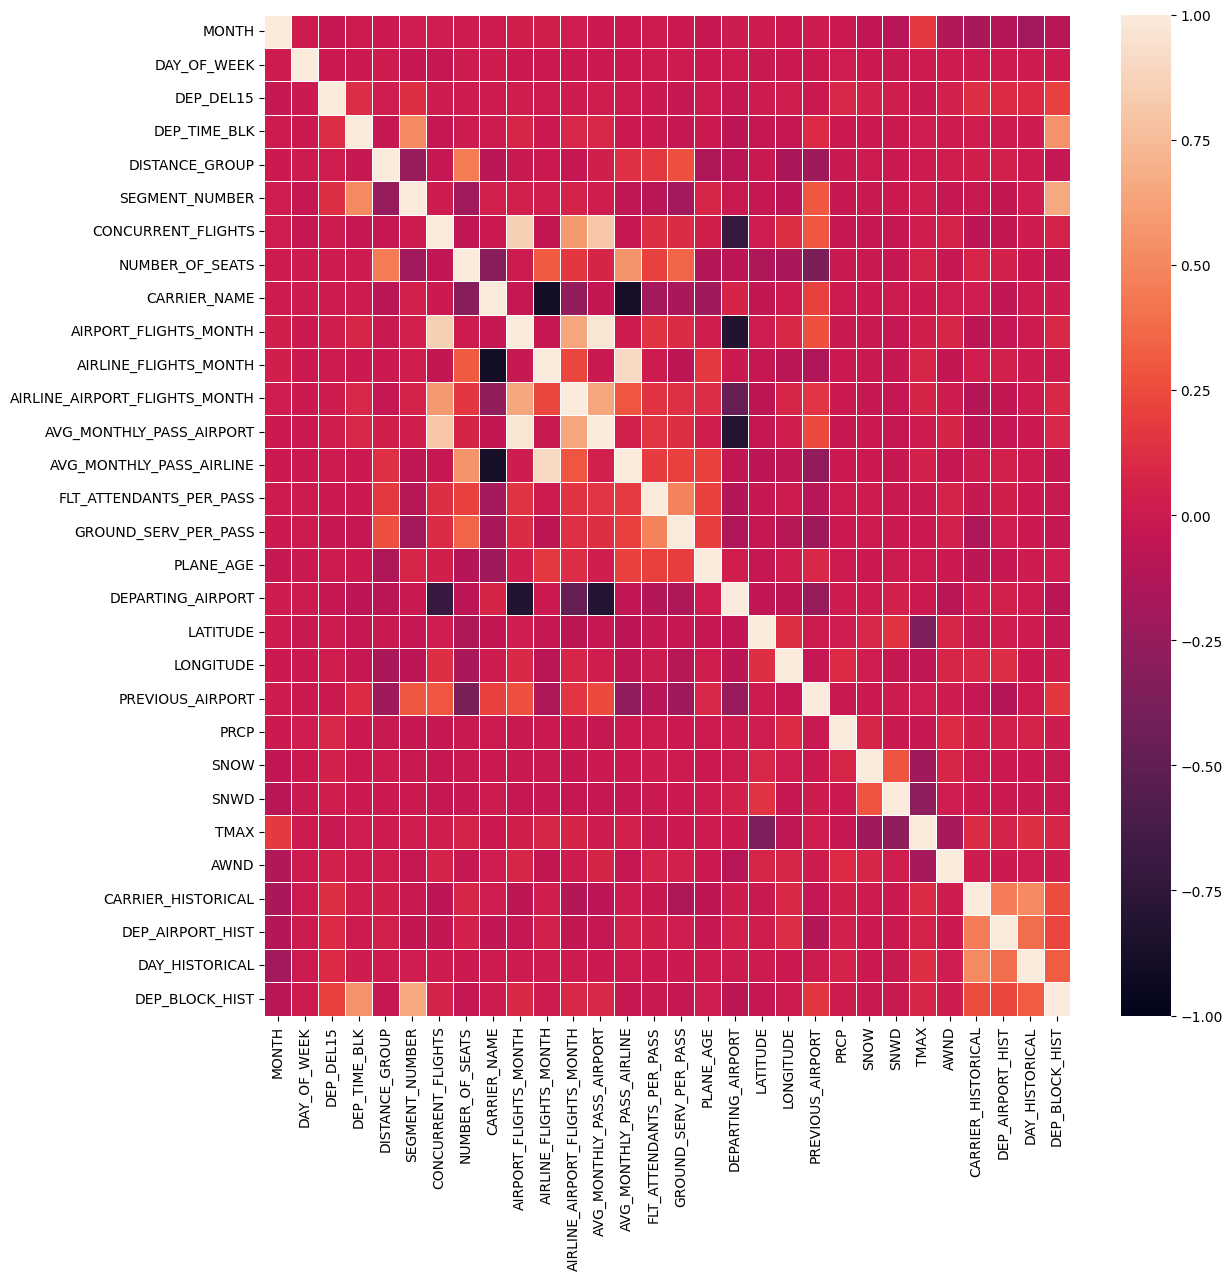

In [8]:
fig, ax = plt.subplots(figsize=(13,13))
sns.heatmap(corr_matrix, vmin = -1, vmax = 1, linewidths=.5)
pass

Обработаем пропущенные значения:

In [9]:
data.fillna(data.mean(), inplace=True)

Преобразуем данные в диапазон [0,1]:

In [10]:
from sklearn.preprocessing import MinMaxScaler

X = data.iloc[:, [0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]].values
y = data.iloc[:, 2].values

def scale_data(X):
    scaler = MinMaxScaler()
    X_scaler = scaler.fit_transform(X)
    return X_scaler

X_scaler = scale_data(X)
data = pd.DataFrame(X_scaler)

data.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.272727,0.833333,0.277778,0.2,0.142857,0.037037,0.225256,0.0625,0.167965,0.679659,...,0.928515,0.413785,0.637931,0.56250,0.273684,0.546350,0.766991,0.002817,0.0,0.0
1,0.181818,0.166667,0.277778,0.1,0.071429,0.277778,0.020478,0.6250,0.390854,0.148102,...,0.057250,0.000000,0.389352,0.46875,0.094737,0.522807,0.915645,0.481690,0.0,0.0
2,0.090909,0.666667,0.277778,0.7,0.071429,0.333333,0.440273,0.1875,0.451751,0.338220,...,0.621869,0.728469,1.000000,0.21875,0.031579,0.499286,0.583498,0.014085,0.0,0.0
3,0.272727,0.833333,0.333333,1.0,0.071429,0.333333,0.467577,0.4375,0.480794,0.138694,...,0.186719,0.092798,0.754862,0.09375,0.052632,0.362798,0.438571,0.095775,0.0,0.0
4,0.636364,1.000000,0.333333,0.0,0.071429,0.240741,0.337884,0.0000,0.384120,0.975559,...,1.000000,0.177328,0.413609,0.62500,0.105263,0.412834,0.473453,0.250704,0.0,0.0


Разобьем данные на обучающую и тестовую выборки:

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_scaler, y, test_size=0.3, random_state=27)

Классификация с помощью метода k-nearest neighbors:

In [15]:
knn = Pipeline([('scaler', StandardScaler()), ('classifier', KNeighborsClassifier(n_neighbors=7, n_jobs=-1))])
knn.fit(X_train, y_train)
predict = knn.predict(X_test)
target_names = ['Not Delay', 'Delay']

In [16]:
print(classification_report(predict, y_test, target_names=target_names))

              precision    recall  f1-score   support

   Not Delay       0.96      0.83      0.89    550094
       Delay       0.13      0.43      0.20     33922

    accuracy                           0.80    584016
   macro avg       0.55      0.63      0.55    584016
weighted avg       0.91      0.80      0.85    584016

